# General Algorithmic Confusion Analysis
Section 2.3 in the paper

## Metrics
Important points: 
- We measure correlation between leakage and the selection function, which uses both the key and the ct/pt pair
    - For DPA, our correlation is the difference of means: ($ \frac{\sum \mathtt{L}_{V=0}}{N_{V=1}} - \frac{\sum \mathtt{L}_{V=0}}{N_{V=0}}$)
    - For CPA, it is the Pearson correlation. ($\frac{E\{[V - E(V)][\mathtt{L} - E(\mathtt{L})]\}}{\sqrt{D(V)}\sqrt{D(\mathtt{L})}}$)

## Selection function
The selection function of DPA in our case is simply the first output bit of the first s-box, whereas for CPA it is all bits of the first s-box output (defined as the first h bits in the paper, but h is simply equal to the length of the output.)
## Goal
We want to define the characteristic confusion values of the DES S-boxes.

In the paper, they define the confusion coefficients for DPA as using the first bit of the first s-box to determine how the key diffuses into the output. For CPA, it is defined as the full output of the first S-box in DES.

The confusion analysis os computed using the key pairs, for which there are $\frac{2^6 - (2^6-1)}{2}$ pairs, since we only care about unique pairs $k_i, k_j$ where $k_i \neq k_j$

It is unclear how the CPA confusion analysis is conducted, because the pearson correlation between 2 keys does not produce the correct result, nor does naively computing V|ki - V|kj using hamming weights or any similar metric. 

Mean confusion: 0.5079365079365079
Min confusion: 0.25
Max confusion: 0.75
All distinct values: [0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75]
Mean confusion: 0.3728628872390272
Min confusion: 0.37281753594811007
Max confusion: 0.372896844661701
All distinct values: [np.float64(0.37281753594811007), np.float64(0.3728231232547427), np.float64(0.372825606502135), np.float64(0.37282840015545127), np.float64(0.3728288657643373), np.float64(0.3728305729969195), np.float64(0.37283678111540025), np.float64(0.3728372467242863), np.float64(0.37284159240722275), np.float64(0.37284562768423524), np.float64(0.3728462484960833), np.float64(0.37284655890200735), np.float64(0.37284671410496933), np.float64(0.3728471797138554), np.float64(0.3728481109316275), np.float64(0.372852611817526), np.float64(0.37285292222345007), np.float64(0.3728533878323361), np.float64(0.3728535430352981), np.float64(0.3728549398619563), np.float64(0.3728552502678803), np.float64(0.3728555606738043), np.fl

Text(0.5, 1.0, 'Distribution of Confusion Coefficients')

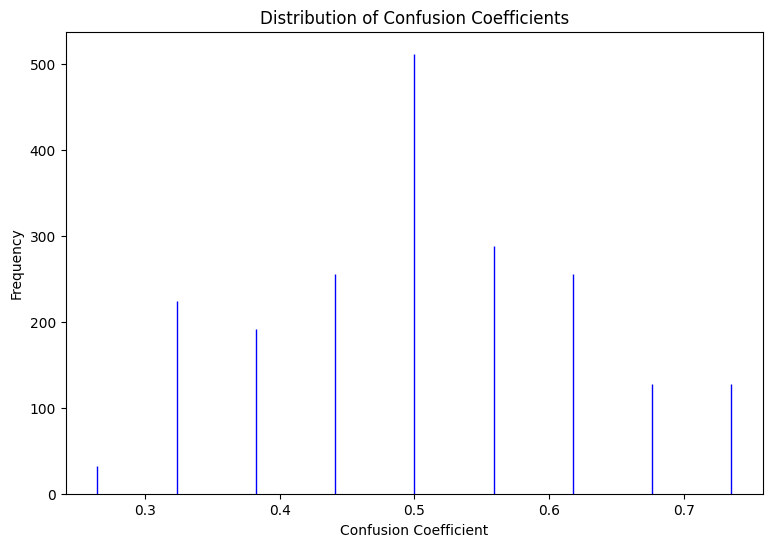

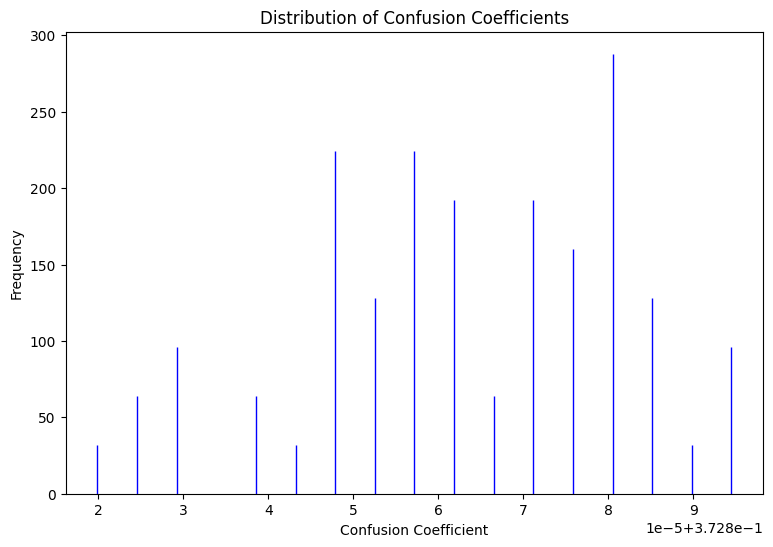

In [1]:
# DEFINITIONS
import analysis_functions as af
import numpy as np
import matplotlib.pyplot as plt

dpa_output = af.compute_confusion_coefficients_DES(af.DES_Sboxes[0], 'DPA')
print(f"Mean confusion: {np.mean(dpa_output)}")
print(f"Min confusion: {np.min(dpa_output)}")
print(f"Max confusion: {np.max(dpa_output)}")

print(f"All distinct values: {sorted(set(dpa_output))}") # Simple way to get all unique values

# Generate the figure
_, ax = plt.subplots(figsize=(9, 6))
ax.hist(dpa_output, rwidth=0, bins='auto', edgecolor='blue', alpha=1)

ax.set_xlabel('Confusion Coefficient')
ax.xaxis.limit_range_for_scale(0.2, 0.8)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Confusion Coefficients')

# This comes out incorrect...
cpa_output = af.compute_confusion_coefficients_DES(af.DES_Sboxes[0], 'CPA')
print(f"Mean confusion: {np.mean(cpa_output)}")
print(f"Min confusion: {np.min(cpa_output)}")
print(f"Max confusion: {np.max(cpa_output)}")

print(f"All distinct values: {sorted(set(cpa_output))}") # Simple way to get all unique values

_, ax2 = plt.subplots(figsize=(9, 6))
ax2.hist(cpa_output, rwidth=0, bins='auto', edgecolor='blue', alpha=1)
ax2.set_xlabel('Confusion Coefficient')
ax2.xaxis.limit_range_for_scale(1.1, 3)
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Confusion Coefficients')